In [1]:
%matplotlib notebook
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.environ.setdefault('GLUE_SETTINGS_MODULE', 'settings')

'settings'

In [3]:
import diluted_net
from flowfairy.conf import settings

In [4]:
batch_size = settings.BATCH_SIZE
samplerate = settings.SAMPLERATE

In [5]:
x = tf.placeholder(tf.float32, [None, samplerate])
y = tf.placeholder(tf.int32, None)

In [6]:
with tf.variable_scope('network'):
    net = diluted_net.conv_net(x, y,)

conv1:  Tensor("network/conv1/add:0", shape=(?, 11024, 1, 4), dtype=float32)
pool1:  Tensor("network/pool1/MaxPool:0", shape=(?, 5512, 1, 4), dtype=float32)
conv2:  Tensor("network/conv2/add:0", shape=(?, 5512, 1, 16), dtype=float32)
pool2:  Tensor("network/pool2/MaxPool:0", shape=(?, 2756, 1, 16), dtype=float32)
conv3:  Tensor("network/conv3/add:0", shape=(?, 2756, 1, 16), dtype=float32)
depth2space:  Tensor("network/DepthToSpace:0", shape=(?, 11024, 4, 1), dtype=float32)
conv4:  Tensor("network/conv4/add:0", shape=(?, 11024, 1, 16), dtype=float32)
concat:  Tensor("network/concat:0", shape=(?, 11024, 1, 20), dtype=float32)
conv5:  Tensor("network/conv5/add:0", shape=(?, 11024, 1, 256), dtype=float32)
out:  Tensor("network/Reshape_2:0", shape=(?, 11024, 256), dtype=float32)


In [7]:
saver = tf.train.Saver()
sess = tf.InteractiveSession()

In [8]:
saver.restore(sess, tf.train.latest_checkpoint('logs/diluted_2334_bnF'))

INFO:tensorflow:Restoring parameters from /home/s123094/FlowFairy/examples/denoise_class/logs/diluted_2334_bnF/model.ckpt-10000


In [9]:
coll = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)


In [10]:
for v in coll:
    print(v)

<tf.Variable 'network/conv1/weights:0' shape=(256, 1, 1, 4) dtype=float32_ref>
<tf.Variable 'network/conv1/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'network/conv2/weights:0' shape=(128, 1, 4, 16) dtype=float32_ref>
<tf.Variable 'network/conv2/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv3/weights:0' shape=(128, 1, 16, 16) dtype=float32_ref>
<tf.Variable 'network/conv3/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv4/weights:0' shape=(128, 1, 4, 16) dtype=float32_ref>
<tf.Variable 'network/conv4/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv5/weights:0' shape=(1, 1, 20, 256) dtype=float32_ref>
<tf.Variable 'network/conv5/biases:0' shape=(256,) dtype=float32_ref>


In [51]:
def classify(val):
    val = (val-np.min(val))/(np.max(val)-np.min(val))
    return np.floor(val*255)

In [105]:
myrange = np.arange(samplerate) / samplerate
mysine = np.sin(myrange * np.pi * 2 * 351)
#mysine2 = np.sin(myrange * np.pi * 2 * 400)
#mysine=mysine+mysine2
noise = np.random.uniform(0, 0, samplerate).astype('float32')
chunk = 25
k = np.ones(samplerate * 1, dtype=np.float32)
j = np.random.randint(chunk, samplerate*1)
start=j-chunk
end=start+chunk*3
k[j:j+chunk] = 0
nx=mysine+noise

In [106]:
pred = tf.argmax(net, 2)
b = np.array([nx*k])

run = sess.run(pred, feed_dict={x: classify(b), y:classify(mysine) })

<IPython.core.display.Javascript object>


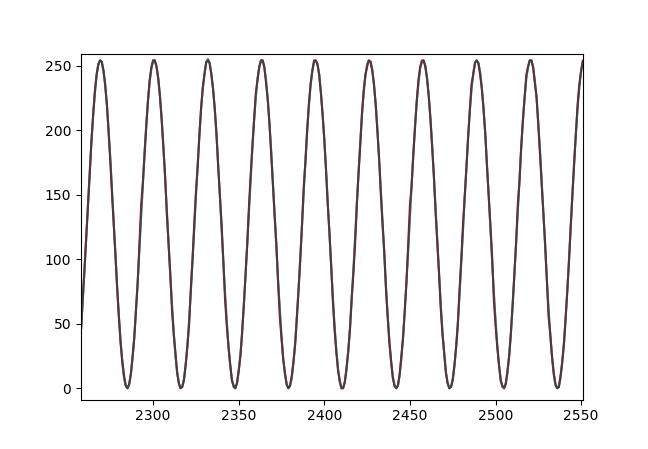

In [107]:

plt.plot(run[0], 'r')
plt.plot(classify(mysine), 'b', alpha=0.5)
plt.plot(classify(b)[0], 'g', alpha=0.5)
plt.show()